In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# KNN
dataset = pd.read_csv("dataset/train.csv")
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset = dataset.dropna()
dataset = dataset.drop("Loan_ID", axis=1)
X = dataset.drop('Loan_Status', axis=1)
y = dataset['Loan_Status']

In [5]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scaling for numeric features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding for categorical features
    ])

# Create a pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


In [6]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [7]:
accuracy = pipeline.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.78


To evaluate the performance of your machine learning model and derive meaningful statistics, you can use various metrics and techniques. Here are some common evaluation metrics and statistical measures you can consider:

- **Confusion Matrix:**
  - A confusion matrix provides a detailed breakdown of the model's performance. It includes True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).
  - From the confusion matrix, you can calculate metrics such as accuracy, precision, recall, and F1-score.

- **Accuracy:**
  - Accuracy measures the overall correctness of the model's predictions.
  - **Formula:**
    ```
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    ```

- **Precision:**
  - Precision measures the accuracy of positive predictions made by the model.
  - **Formula:**
    ```
    Precision = TP / (TP + FP)
    ```

- **Recall (Sensitivity):**
  - Recall measures the ability of the model to capture all relevant instances.
  - **Formula:**
    ```
    Recall = TP / (TP + FN)
    ```

- **F1-Score:**
  - The F1-score is the harmonic mean of precision and recall, providing a balanced measure.
  - **Formula:**
    ```
    F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
    ```

- **Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC):**
  - AUC-ROC measures the trade-off between true positive rate and false positive rate across different threshold values.
  - It is particularly useful for binary classification problems.
  - Higher AUC-ROC values indicate better model performance.

- **Area Under the Precision-Recall Curve (AUC-PR):**
  - AUC-PR is a metric suitable for imbalanced datasets and focuses on the precision-recall trade-off.
  - It measures the area under the precision-recall curve.

- **Classification Report:**
  - The classification report in scikit-learn provides a comprehensive summary of precision, recall, F1-score, and support for each class.


In [8]:
predictions = pipeline.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='Y')
recall = recall_score(y_test, predictions, pos_label='Y')
f1 = f1_score(y_test, predictions, pos_label='Y')

label_encoder = LabelEncoder()
y_true_numeric = label_encoder.fit_transform(y_test)
predictions_numeric = label_encoder.transform(predictions)

roc_auc = roc_auc_score(y_true_numeric, predictions_numeric)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.7778
Precision: 0.7899
Recall: 0.9307
F1-Score: 0.8545
AUC-ROC: 0.6746

Classification Report:
              precision    recall  f1-score   support

           N       0.72      0.42      0.53        43
           Y       0.79      0.93      0.85       101

    accuracy                           0.78       144
   macro avg       0.75      0.67      0.69       144
weighted avg       0.77      0.78      0.76       144



In [9]:
dataset_test = pd.read_csv("dataset/test.csv")
dataset_test = dataset_test.drop("Loan_ID", axis=1)
dataset_test = dataset_test.dropna()

In [10]:
predictions = pipeline.predict(dataset_test)
print(predictions)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y

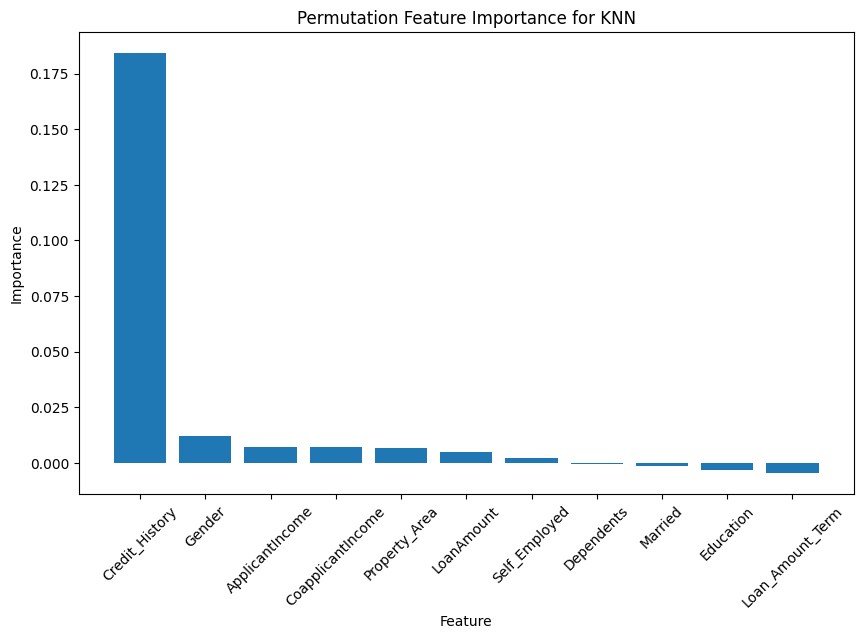

In [11]:
# Assuming X_train and y_train are your training data

# Get permutation feature importance
perm_importance = permutation_importance(pipeline, X_train, y_train, n_repeats=30, random_state=42)

# Sort indices by importance
indices = perm_importance.importances_mean.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), perm_importance.importances_mean[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Permutation Feature Importance for KNN")
plt.show()

The whole process onwards is incorrect and offers an accuracy of 0.99 lol

In [12]:
exit()

In [13]:
# dataset scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Male'

: 

In [ ]:
# Fitting and prediction with testing data
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[159   0]
 [  1  25]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       159
         1.0       1.00      0.96      0.98        26

    accuracy                           0.99       185
   macro avg       1.00      0.98      0.99       185
weighted avg       0.99      0.99      0.99       185

Accuracy: 0.9945945945945946


In [ ]:
# Getting the test dataset provided

dataset_test = pd.read_csv("dataset/test.csv")
dataset_test.head()
dataset_test = clean_dataset(dataset_test, test_data=True)
y_pred = classifier.predict(dataset_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
